In [1]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
%jsroot on
from ROOT import gROOT, gStyle, gDirectory, gPad

from array import array

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath
import portROOT2pd

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

TARGET_OVERVOLTAGE = 3 # V
MV_PER_TRIM = -2. # mV/DAC
MV_PER_BULK = 20. # mV/DAC

topdir = os.path.dirname(os.path.abspath("__file__"))
settings_dir = os.path.join(topdir,"settings")

# fileList = filepath.getfilelist(["bulk_scan_crvaging020"],"recoROOT",9)[0]
# Lazy method... hardcode the file paths
# fileList = [
# '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/6b/46/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002107_000.root',
# '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/62/be/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002108_000.root',
# '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/2d/99/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002109_000.root',
# '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/1a/d0/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002110_000.root',
# '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/52/d8/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002111_000.root']
fileList = [ 
    '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/40/44/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002114_000.root',
    '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/e7/16/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002115_000.root',
    '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/2a/e5/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002116_000.root',
    '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/52/1b/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002117_000.root',
    '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/6e/2e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002118_000.root'
]
    
DeltaBulkNorm = filepath.datatag["bulk_scan_crvaging020"]["bulk"]
print(fileList)

nSmooth = 1 
tdict = {'*':[["temperatureCMB[0][0]","temperatureCMB[1][0]","temperatureCMB[2][0]",
               "temperatureCMB[3][0]","temperatureCMB[4][0]","temperatureCMB[5][0]",
               "temperatureCMB[6][0]","temperatureCMB[7][0]"],
              ["temperatureFEB[0:8]"]]}


Welcome to JupyROOT 6.28/10
['/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/40/44/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002114_000.root', '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/e7/16/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002115_000.root', '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/2a/e5/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002116_000.root', '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/52/1b/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002117_000.root', '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-010-000/root/6e/2e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002118_000.root']


Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002114_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002115_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002116_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002117_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002118_000.root


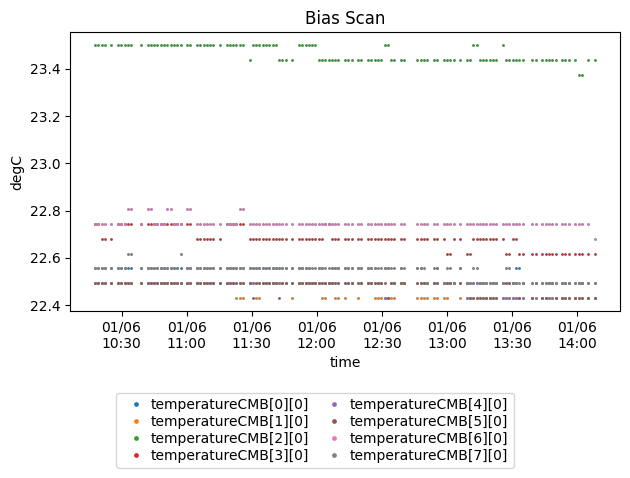

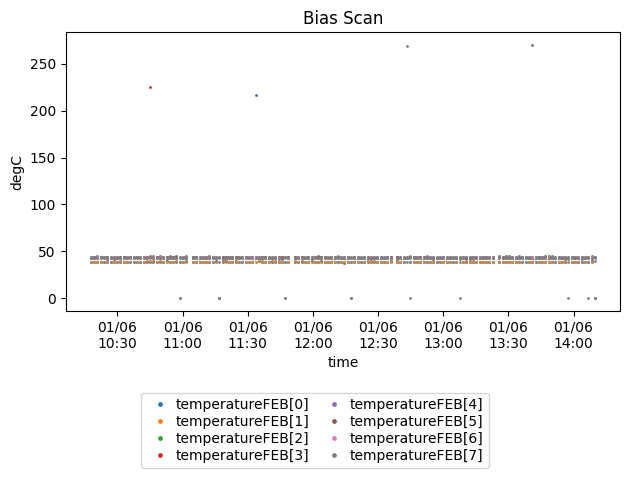

In [2]:
# tfig = utils.plot_dqm(fileList, tdict, '& 0xfffffffffffffe == 0x0', False, nSmooth, True, "Bias Scan;time;degC") 
tfig = utils.plot_dqm(fileList, tdict, ' == 0x0', False, nSmooth, True, "Bias Scan;time;degC") 

In [3]:
import pandas as pd
from scipy import stats
import settings_file

def PortToDFwithBulk(fileList, bulkList):
    df = portROOT2pd.PortToDF(fileList,{'bulkRelative':bulkList})
    return df

def CalibrateByScan(df0, targetVover = TARGET_OVERVOLTAGE, nr = 4, nc = 4, ifDrawCorr = True):
    FEBs = df0['FEB'].unique()
    FEBs = np.sort(FEBs)

    targetBulkOver = targetVover * 1000. / MV_PER_BULK

    df_calib = pd.DataFrame()

    maintitle = "calibration"
    xtitle = "Relative Bulk Settings [DAC unit]"
    ytitle = "SPE [ADC*ns/PE]"

    # Ensure these are integers
    print(df0['FEB'].dtype)  # Should be int
    print(df0['ch'].dtype)   # Should be int

    # df0['FEB'] = df0['FEB'].astype(int)
    # df0['ch'] = df0['ch'].astype(int)
    
    for FEB in FEBs: # [2, 6]:
            
        fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(5*nc, 5*nr), sharey=True)
        plt.subplots_adjust(wspace=0)
        fig.subplots_adjust(top=0.24*nr/(0.04+0.24*nr))
        plt.suptitle(maintitle + ", FEB "+ str(FEB))

        for hdmi, ax in enumerate(axs.flatten()):
            ax.set_xlabel(xtitle)
            if(hdmi % 4 == 0):
                ax.set_ylabel(ytitle)
            for inhdmi_chan in range(4):
                chan = hdmi * 4 + inhdmi_chan

                # df0_ = df0.query("FEB==%i & ch==%i"%(FEB, chan)).reset_index()
                df0_ = df0.loc[(df0['FEB'] == FEB) & (df0['ch'] == chan)].reset_index()

                if df0_.empty:
                    print(f"No data for FEB {FEB}, channel {chan}")
                    print(df0_)
                    # df0_.head()
                    
                # else:
                    # print(f"Data for FEB {FEB}, channel {chan}: {df0_.head()}")

                # print(df0_['bulkRelative'].isna().sum())  # Count NaN values in bulkRelative
                # print(df0_['calibRaw'].isna().sum())  # Count NaN values in calibRaw

                x = df0_['bulkRelative']
                y1 = df0_['calibRaw']
                y2 = df0_['calibAdj']

                mask11 = ~np.isnan(y1) 
                mask12 = (y1 != 0)
                mask1 = mask11 & mask12
                x1 = x[mask1]
                y1 = y1[mask1]

                if ifDrawCorr:
                    mask21 = ~np.isnan(y2) 
                    mask22 = (y2 != 0)
                    mask2 = mask21 & mask22
                    x2 = x[mask2]
                    y2 = y2[mask2]

                # Initialize values to NaN
                bulkRelativeSetting1 = np.nan
                yref1 = np.nan
                bulkRelativeSetting2 = np.nan
                yref2 = np.nan

                # Check if there are enough points for regression
                if len(x1) < 3:
                    print(f"Insufficient data for FEB {FEB}, channel {chan}: x1 = {x1}, y1 = {y1}")
                    # Fallback logic if there's not enough data
                    bulkRelativeSetting1 = 0
                    yref1 = 0
                    display(df0_)
                else:
                    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1.astype(float), y1.astype(float))
                    xintercept1 = - intercept1 / slope1
                    bulkRelativeSetting1 = round(xintercept1 + targetBulkOver, 1)
                    yref1 = bulkRelativeSetting1 * slope1 + intercept1
                
                    markers1 = ax.plot(x1, y1, 'o', label='Chan: %d raw, y = %.1f + %.1f * x, (%.1f, %.1f)' % (chan, intercept1, slope1, bulkRelativeSetting1, yref1))
                    ax.plot(x1, slope1 * x1 + intercept1, '--', color=markers1[0].get_color(), linewidth=0.7)

                if ifDrawCorr and len(x2) > 1:
                    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2.astype(float), y2.astype(float))
                    xintercept2 = - intercept2 / slope2
                    bulkRelativeSetting2 = round(xintercept2 + targetBulkOver, 1)
                    yref2 = bulkRelativeSetting2 * slope2 + intercept2

                    markers2 = ax.plot(x2, y2, 'v', label='Chan: %d corr., y = %.1f + %.1f * x, (%.1f, %.1f)' % (chan, intercept2, slope2, bulkRelativeSetting2, yref2), color=markers1[0].get_color())
                    ax.plot(x2, slope2 * x2 + intercept2, ':', color=markers1[0].get_color(), linewidth=0.7)

                ax.legend(fontsize='small')

                # Save the results in df_calib, ensure fallback logic doesn't cause NaN in the output
                df_calib_ = pd.DataFrame()
                df_calib_['FEB'] = [FEB]
                df_calib_['ch'] = [chan]
                df_calib_['bulkRelativeSettingRaw'] = [bulkRelativeSetting1]
                df_calib_['SPErefRaw'] = [yref1]
                if ifDrawCorr:
                    df_calib_['bulkRelativeSettingCorr'] = [bulkRelativeSetting2]
                    df_calib_['SPErefCorr'] = [yref2]
                
                df_calib = pd.concat([df_calib, df_calib_], ignore_index=True)

    return df_calib

run  subrun  FEB  ch   pedestal    calibRaw    calibAdj    FEBtemp  \
0     2114       0    0   0 -13.860900  454.226013  469.287994  38.914005   
1     2114       0    0   1   0.046744  446.024994  461.649994  38.914005   
2     2114       0    0   2   1.845920  452.963013  468.717010  38.914005   
3     2114       0    0   3  18.499399  432.045013  449.165009  38.914005   
4     2114       0    0   4  -2.853270  395.700012  410.931000  38.914005   
...    ...     ...  ...  ..        ...         ...         ...        ...   
2555  2118       0    7  59  -8.514480  523.143005  542.400024  51.120693   
2556  2118       0    7  60  14.979100  576.515015  596.979004  51.120693   
2557  2118       0    7  61   0.778792  563.515015  582.293030  51.120693   
2558  2118       0    7  62   0.208562  548.937012  567.125977  51.120693   
2559  2118       0    7  63  -2.442610  570.193970  588.388977  51.120693   

        CMBtemp      biasV  PEs  PEsCorrected  bulkRelative  
0     22.375000  53.768673  0.0           0.0           -25  
1     22.375000  53.768673  0.0           0.0           -25  
2     22.375000  53.768673  0.0           0.0           -25  
3     22.375000  53.768673  0.0           0.0           -25  
4     22.312500  53.768673  0.0           0.0           -25  
...         ...        ...  ...           ...           ...  
2555  22.250000  54.611721  0.0           0.0            75  
2556  22.238636  54.611721  0.0           0.0            75  
2557  22.238636  54.611721  0.0           0.0            75  
2558  22.238636  54.611721  0.0           0.0            75  
2559  22.238636  54.611721  0.0           0.0            75  

[2560 rows x 13 columns]

int64
int64
Insufficient data for FEB 6, channel 13: x1 = 0   -25
2    25
Name: bulkRelative, dtype: int64, y1 = 0    230.938004
2    530.380981
Name: calibRaw, dtype: float32


index   run  subrun  FEB  ch  pedestal    calibRaw  calibAdj    FEBtemp  \
0    397  2114       0    6  13   4.37316  230.938004       0.0  43.365170   
1    909  2115       0    6  13   4.33254    0.000000       0.0  43.122402   
2   1421  2116       0    6  13   4.32942  530.380981       0.0  43.291069   
3   1933  2117       0    6  13   4.30299    0.000000       0.0  43.255863   
4   2445  2118       0    6  13   4.16957    0.000000       0.0  43.504814   

   CMBtemp      biasV  PEs  PEsCorrected  bulkRelative  
0      0.0  53.548977  0.0           0.0           -25  
1      0.0  54.020699  0.0           0.0             0  
2      0.0  54.503574  0.0           0.0            25  
3      0.0  55.011040  0.0           0.0            50  
4      0.0  55.511116  0.0           0.0            75

Insufficient data for FEB 6, channel 15: x1 = 0   -25
Name: bulkRelative, dtype: int64, y1 = 0    227.263
Name: calibRaw, dtype: float32


index   run  subrun  FEB  ch   pedestal  calibRaw  calibAdj    FEBtemp  \
0    399  2114       0    6  15  22.175400   227.263       0.0  43.365170   
1    911  2115       0    6  15  22.233200     0.000       0.0  43.122402   
2   1423  2116       0    6  15  22.253099     0.000       0.0  43.291069   
3   1935  2117       0    6  15  22.263201     0.000       0.0  43.255863   
4   2447  2118       0    6  15  22.251301     0.000       0.0  43.504814   

   CMBtemp      biasV  PEs  PEsCorrected  bulkRelative  
0      0.0  53.548977  0.0           0.0           -25  
1      0.0  54.020699  0.0           0.0             0  
2      0.0  54.503574  0.0           0.0            25  
3      0.0  55.011040  0.0           0.0            50  
4      0.0  55.511116  0.0           0.0            75

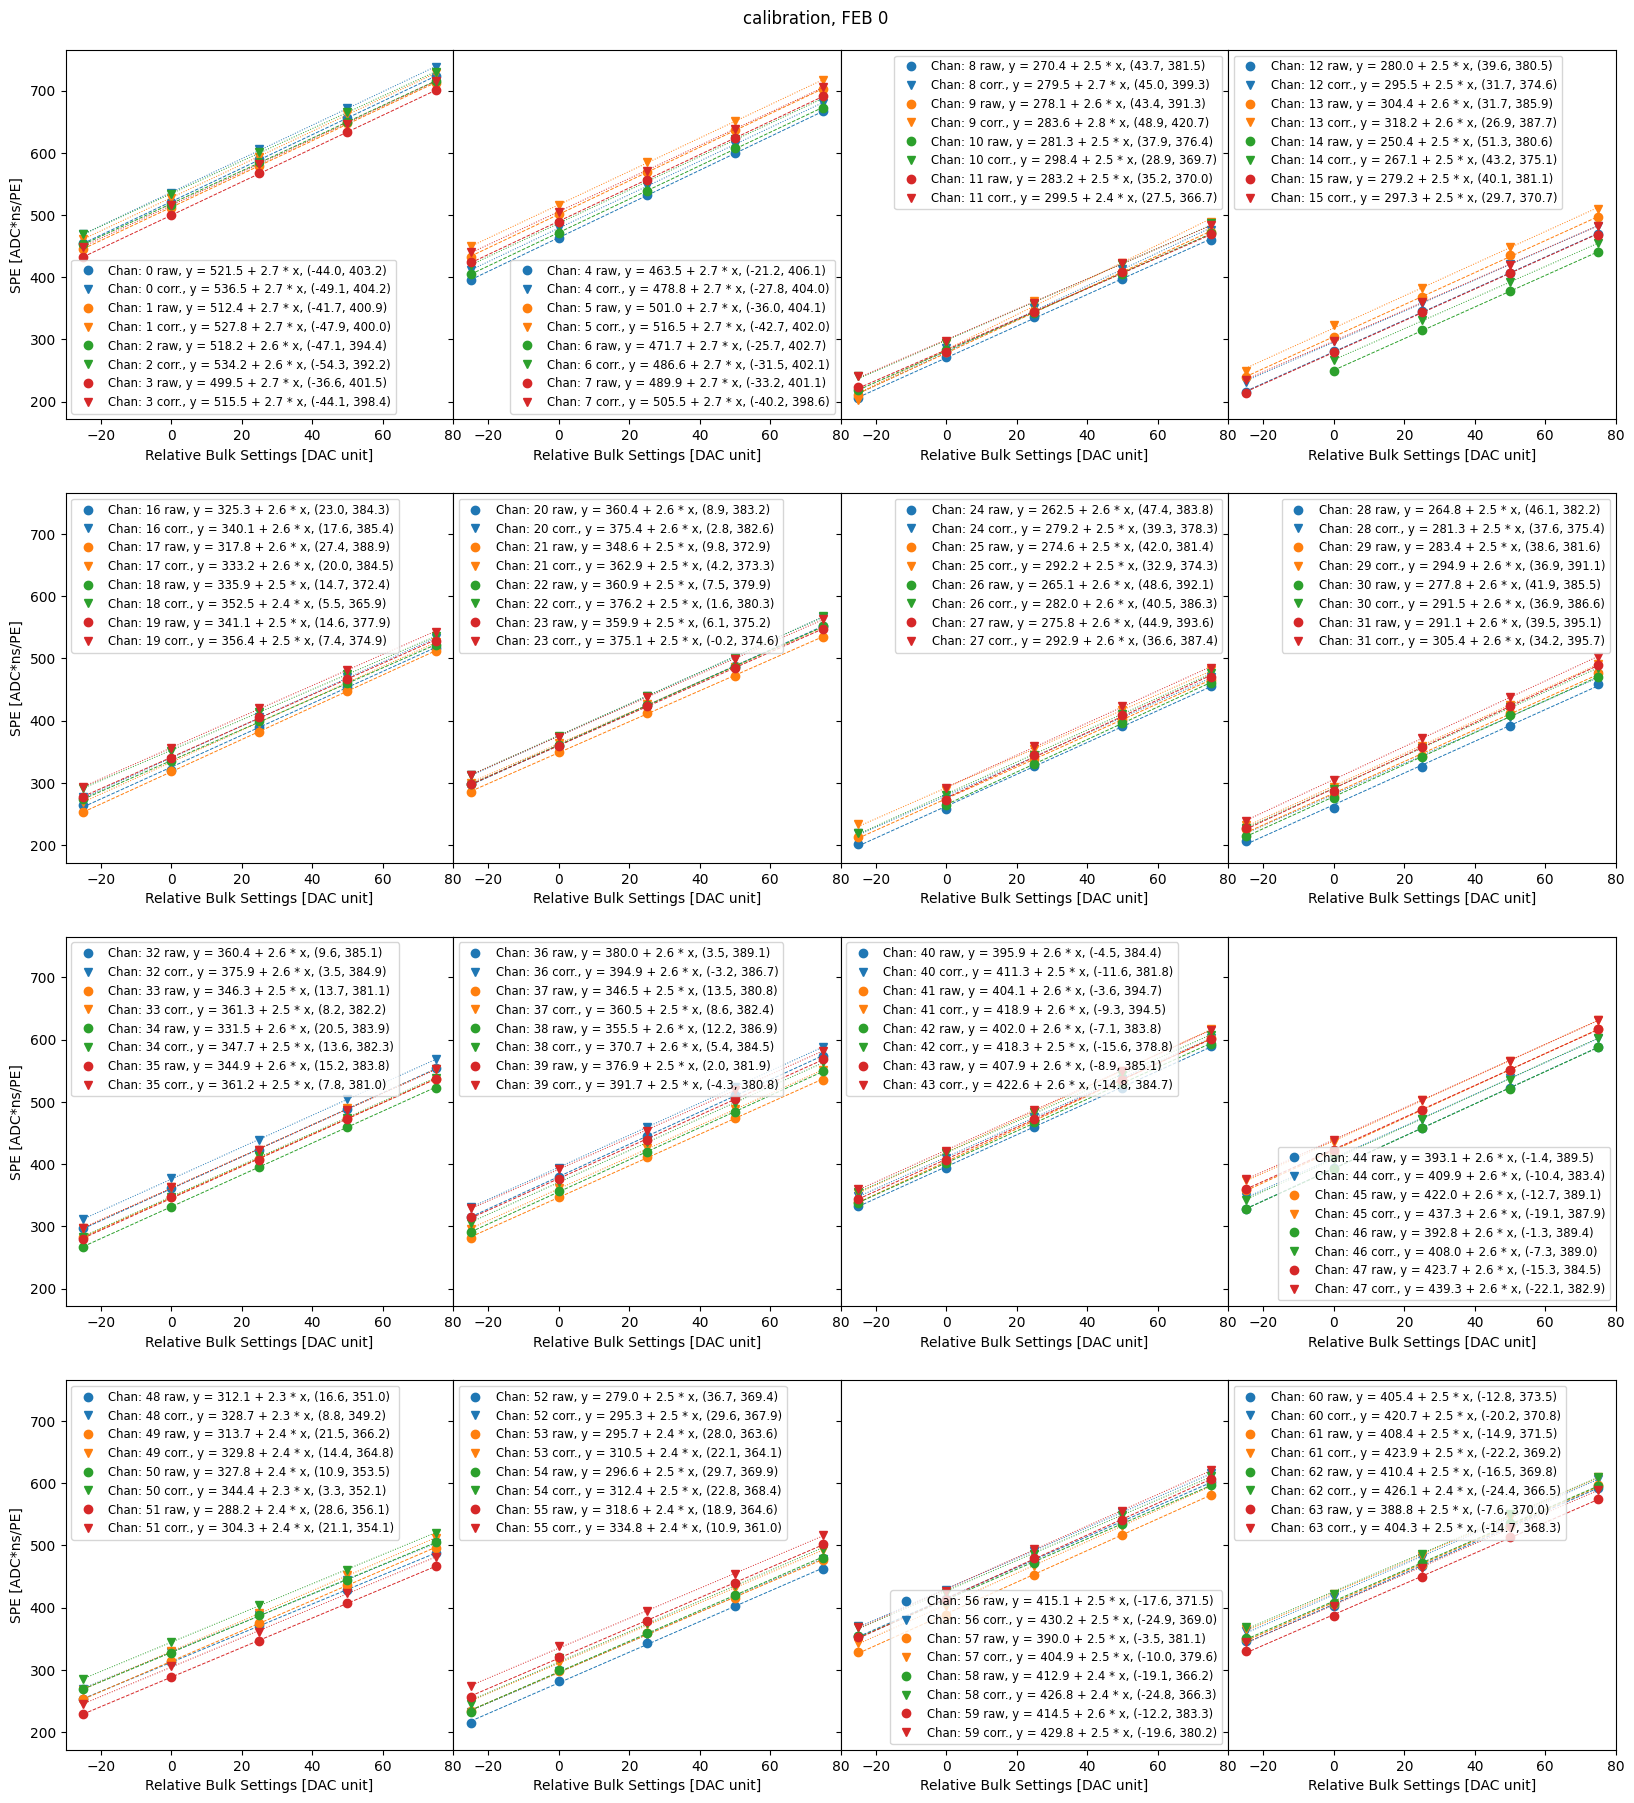

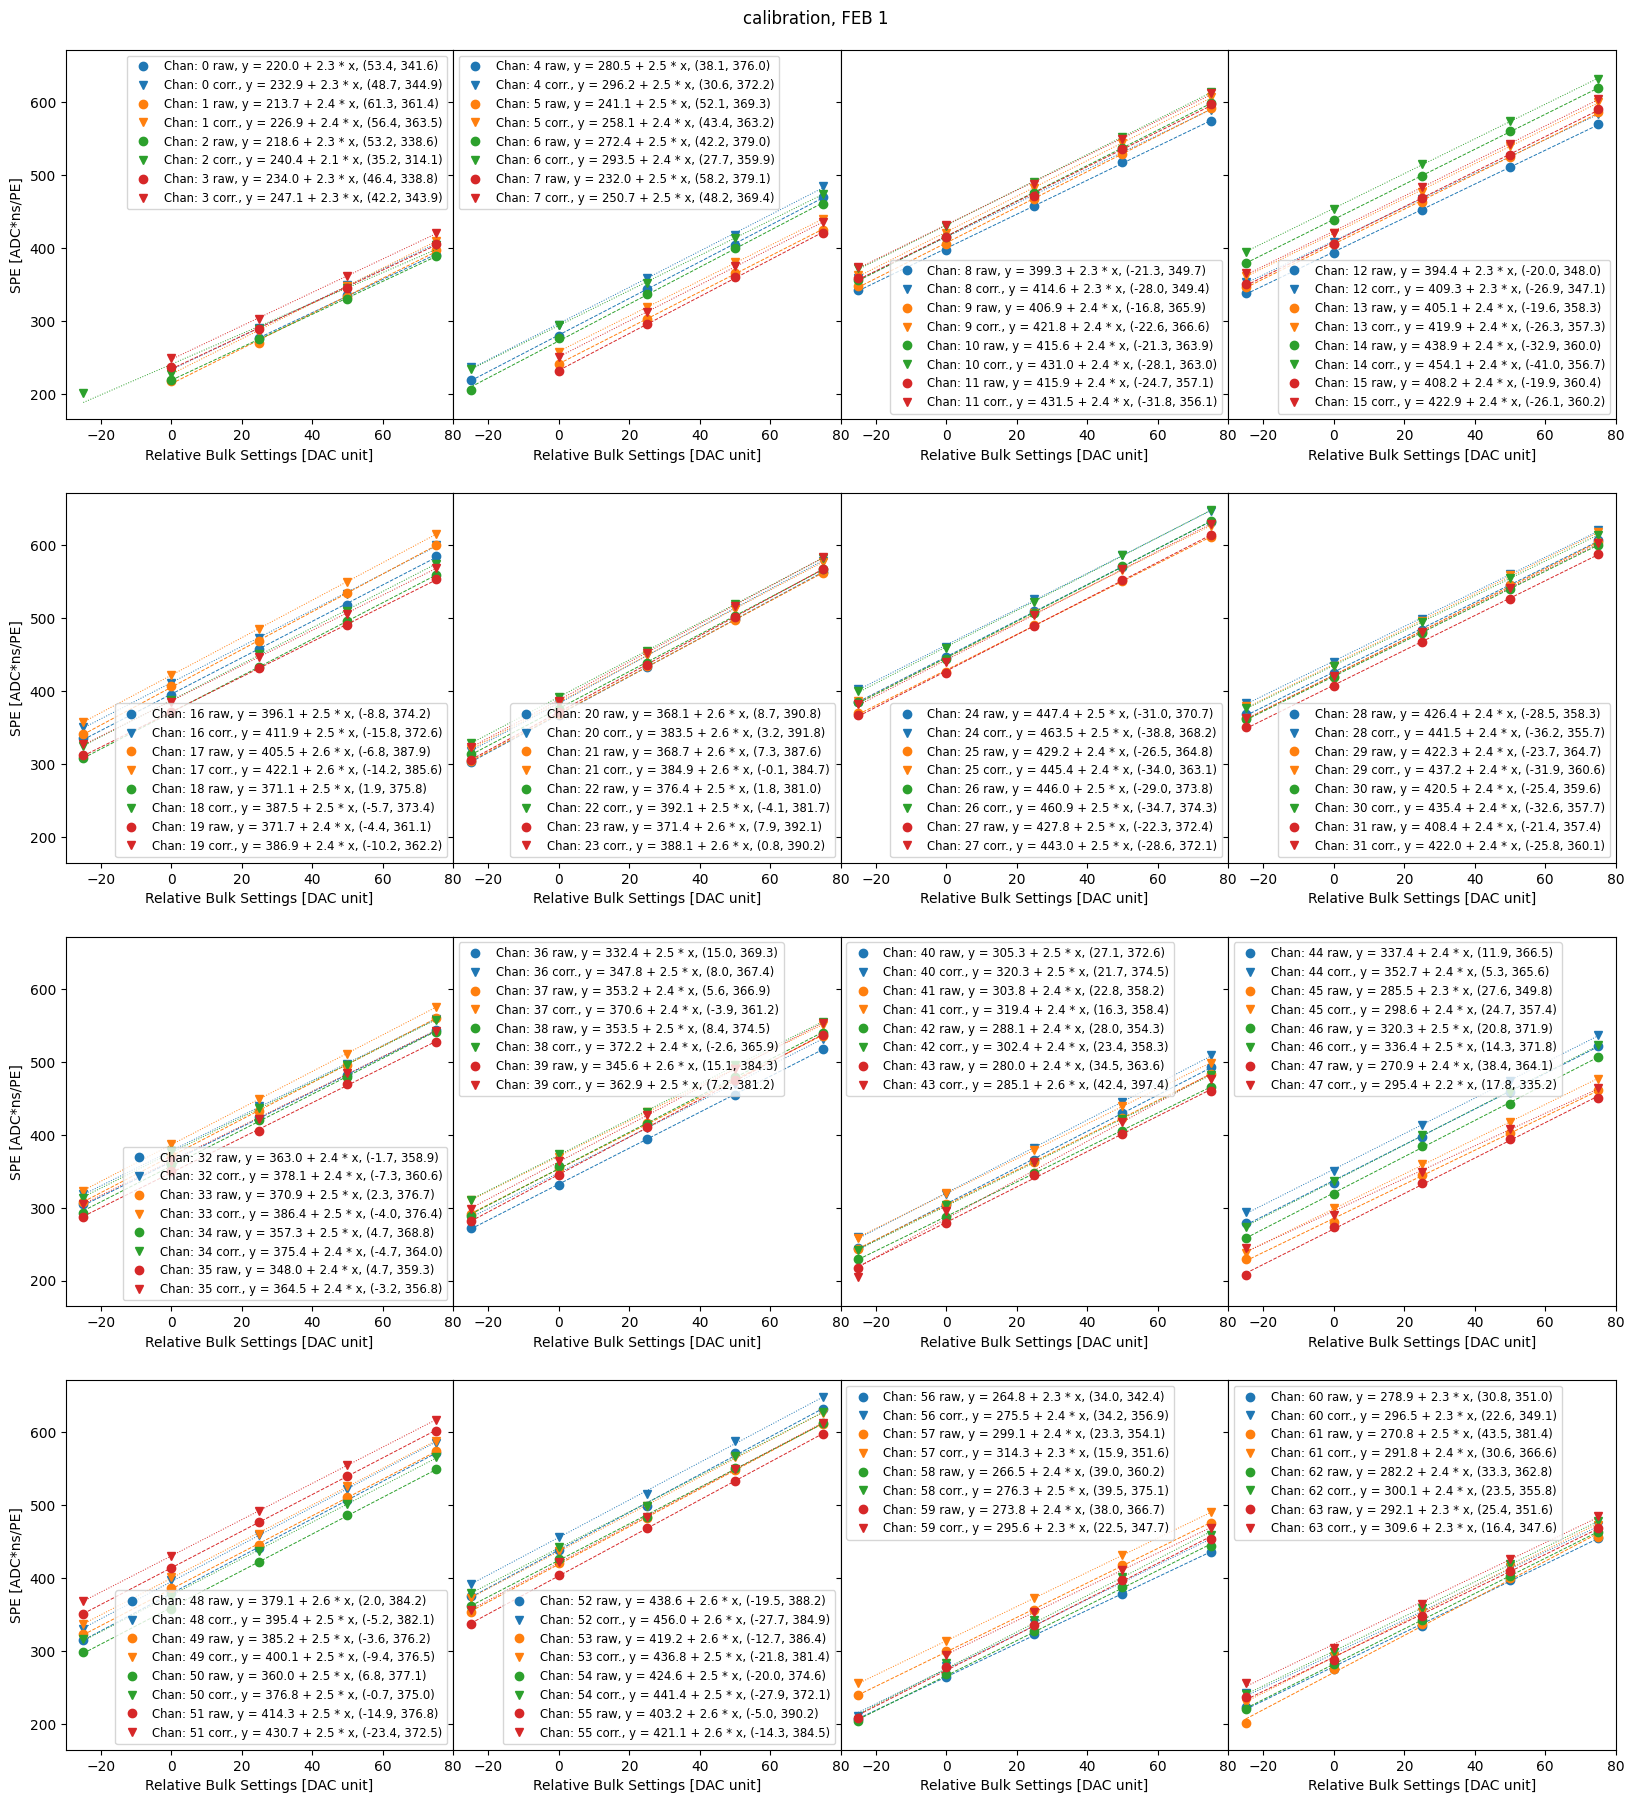

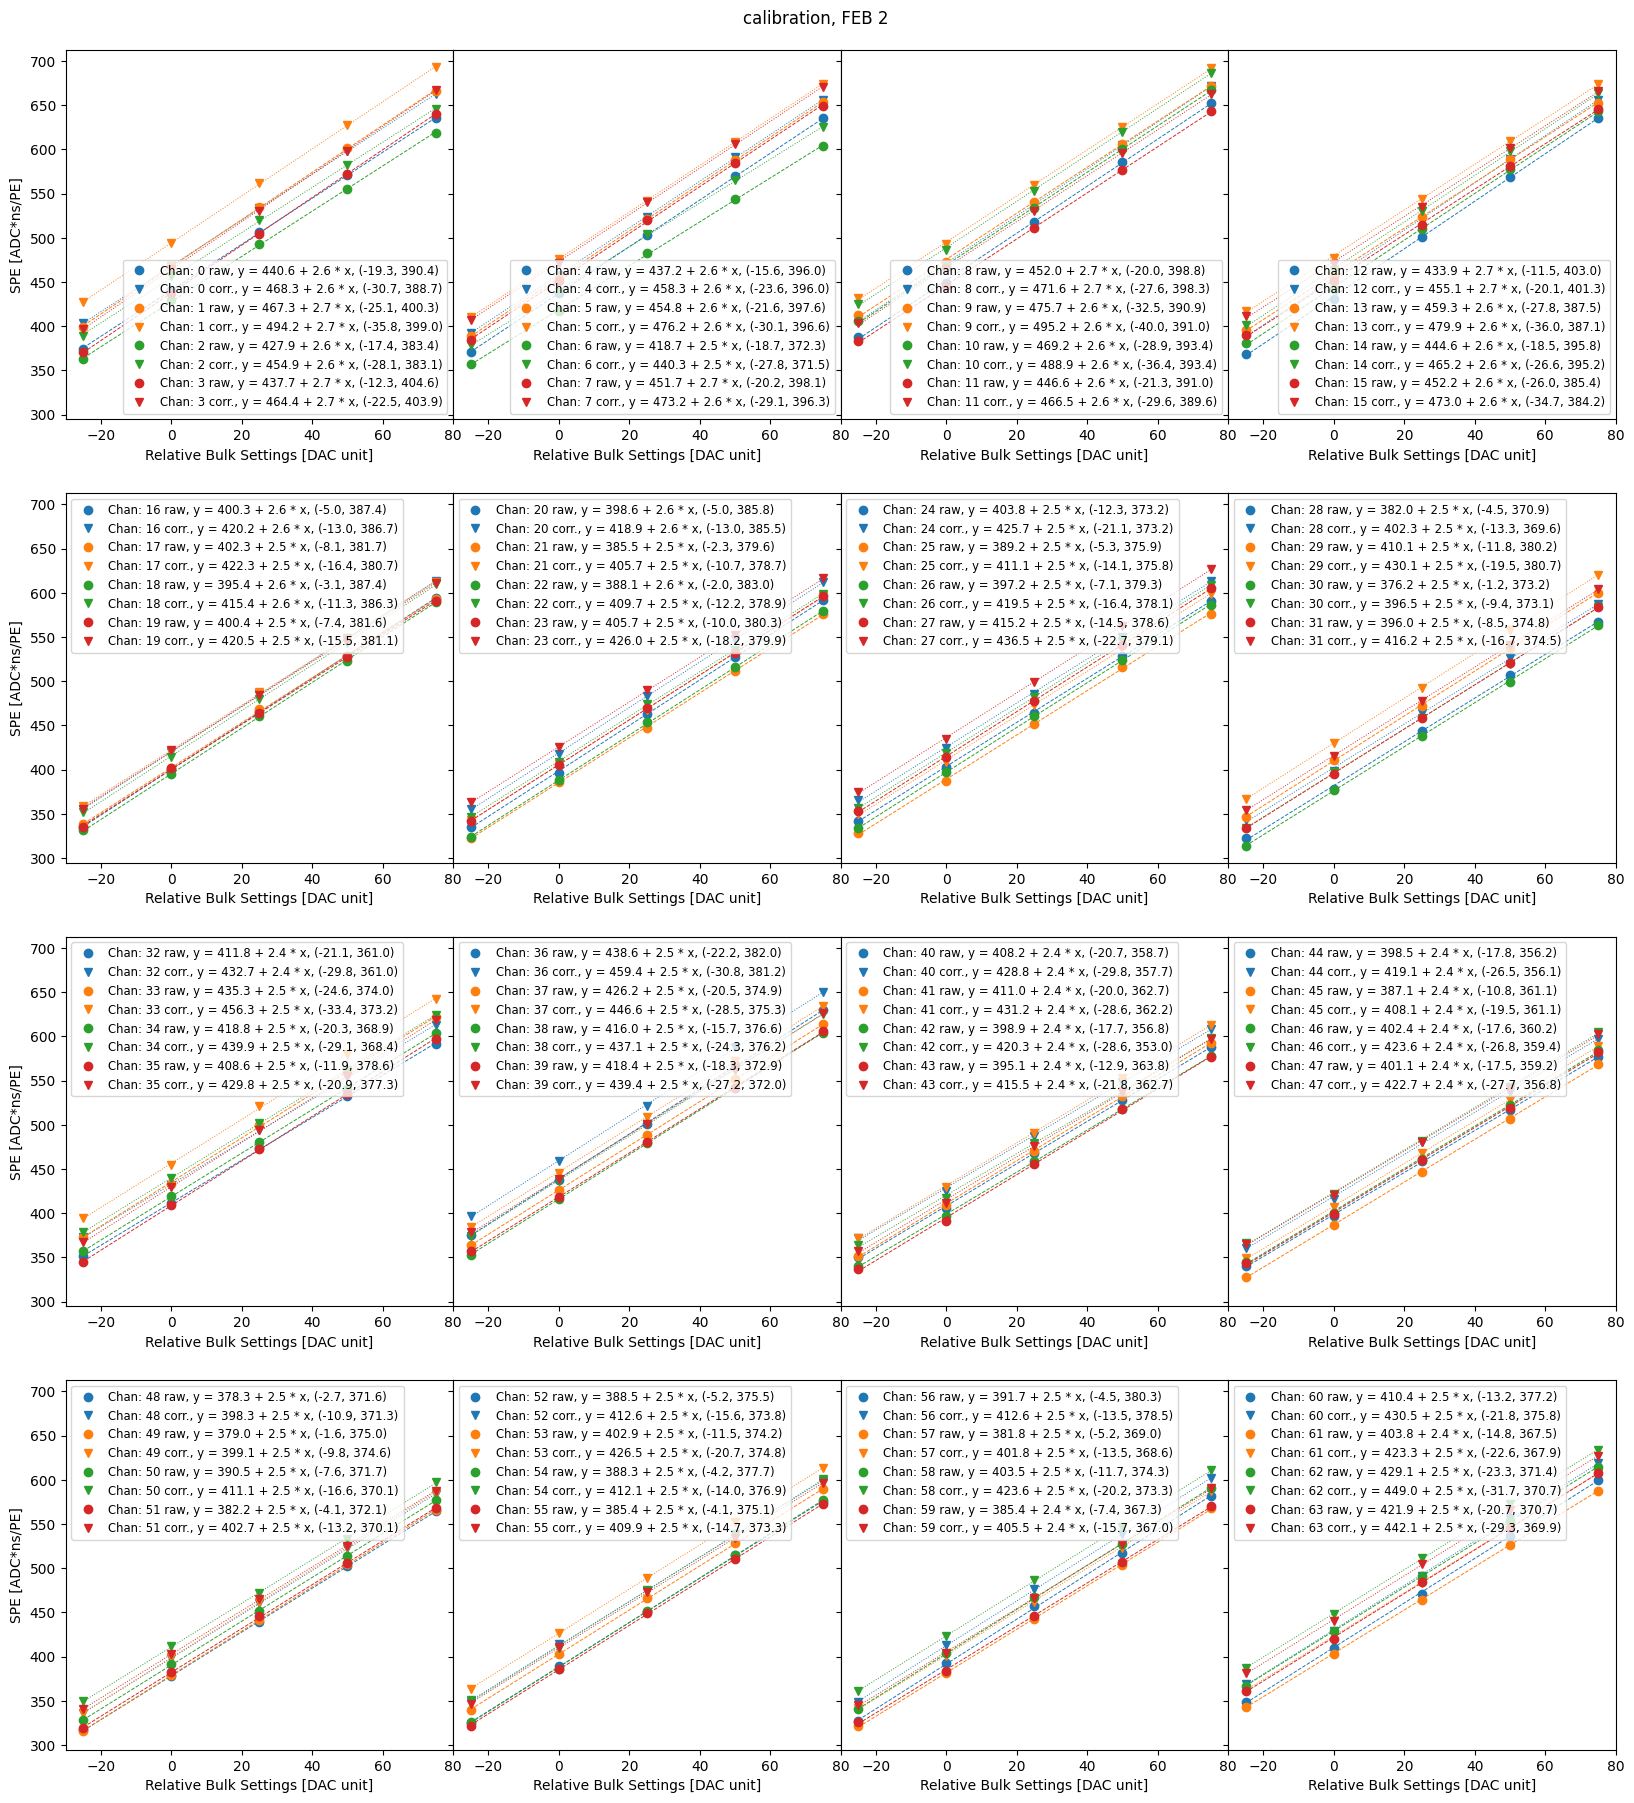

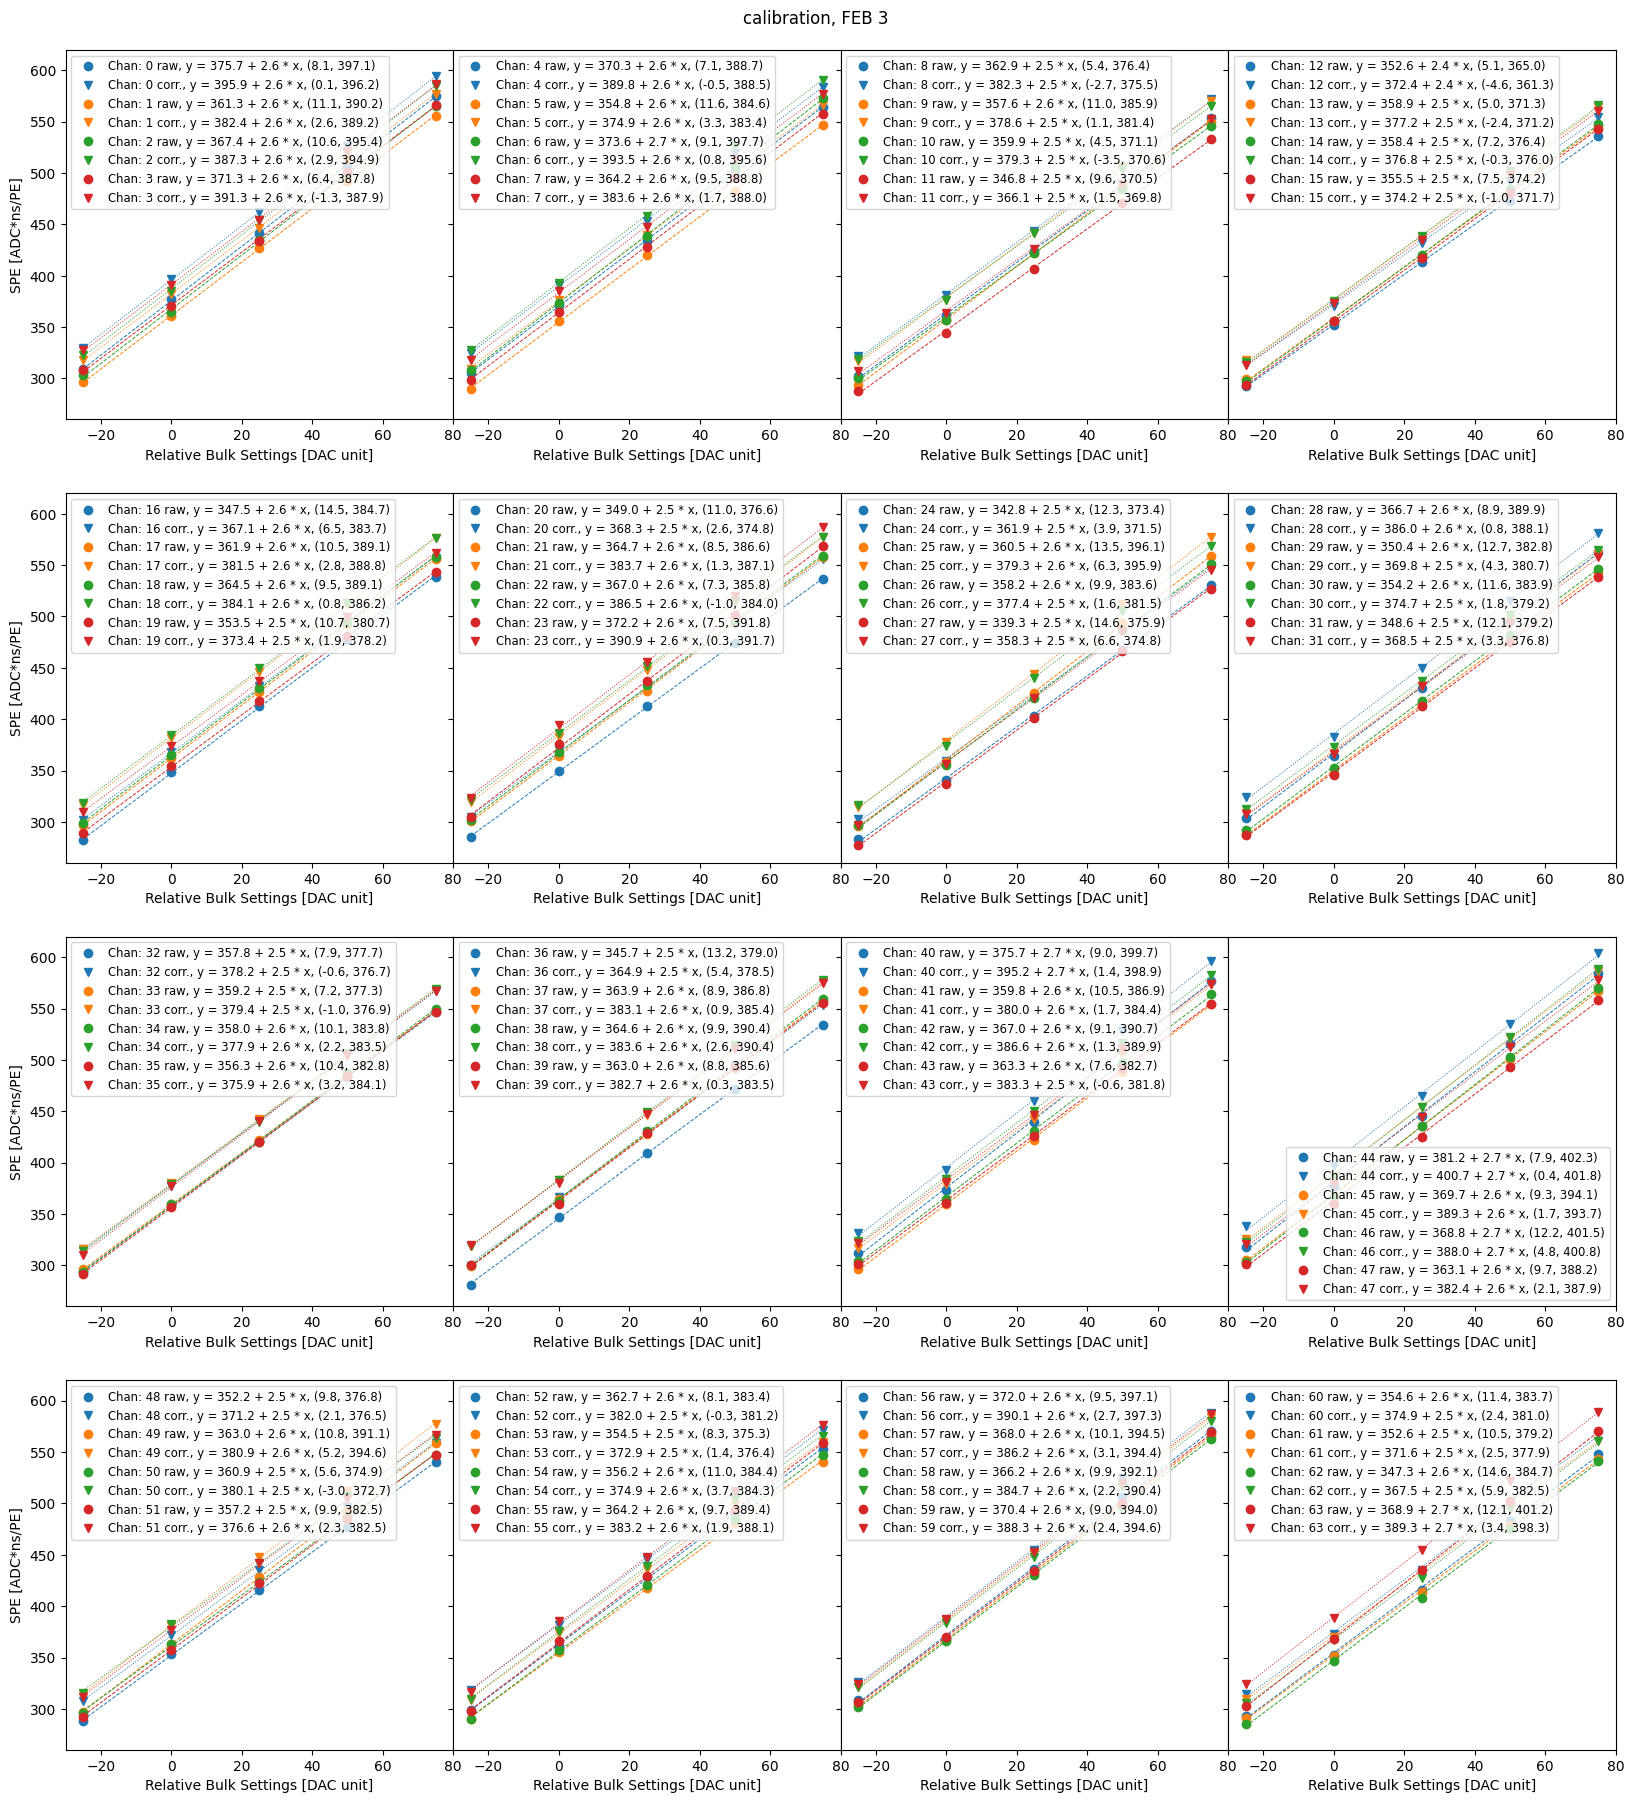

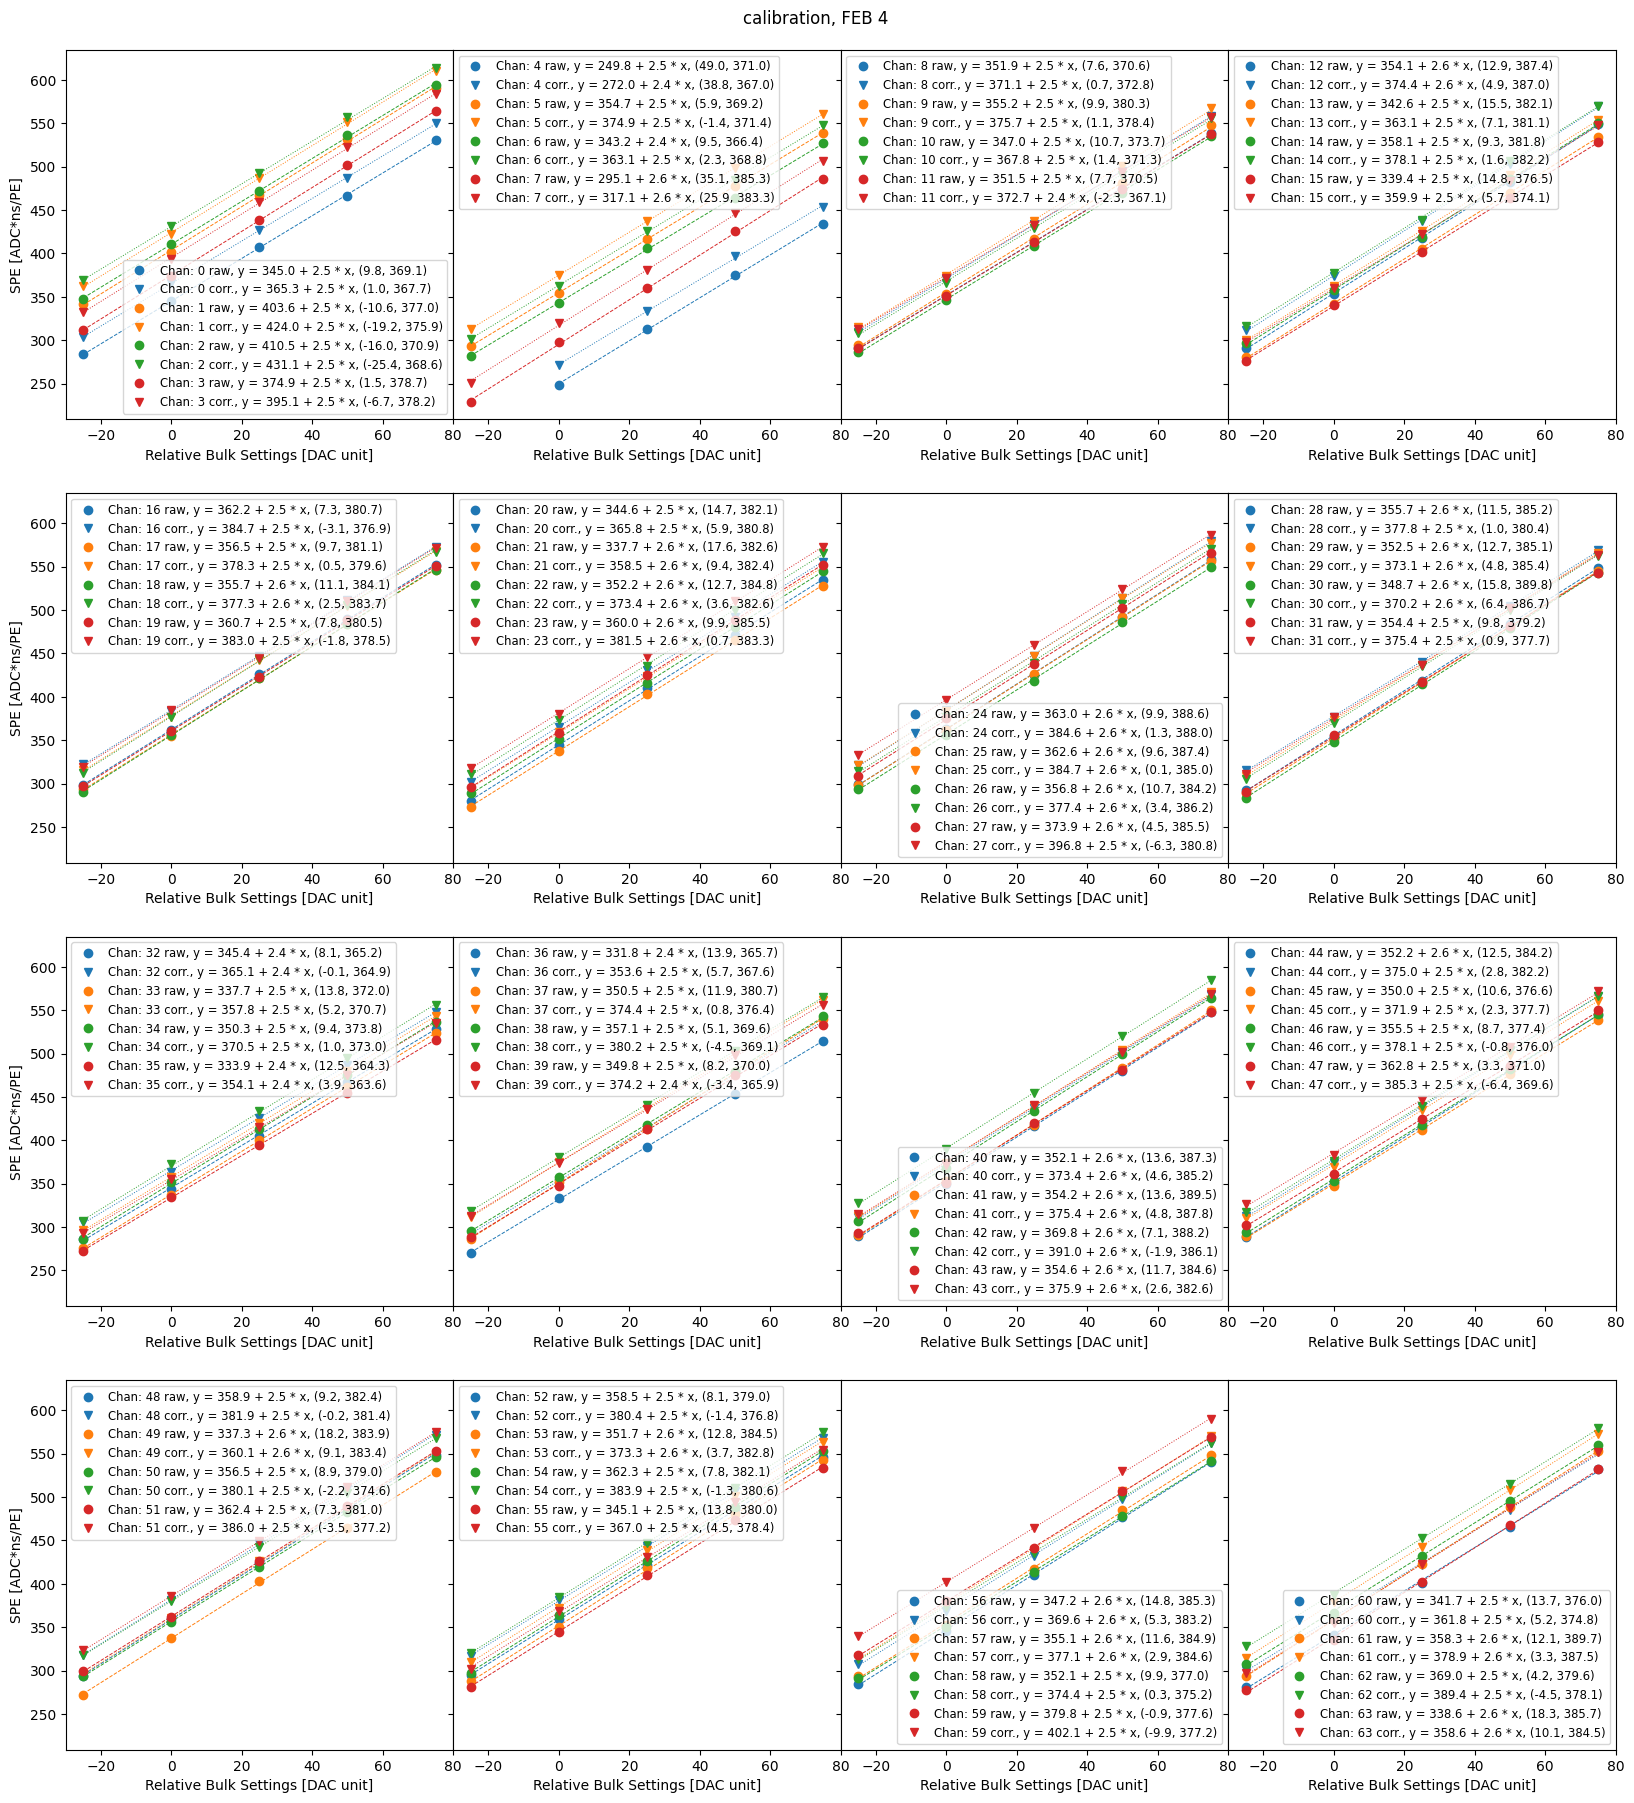

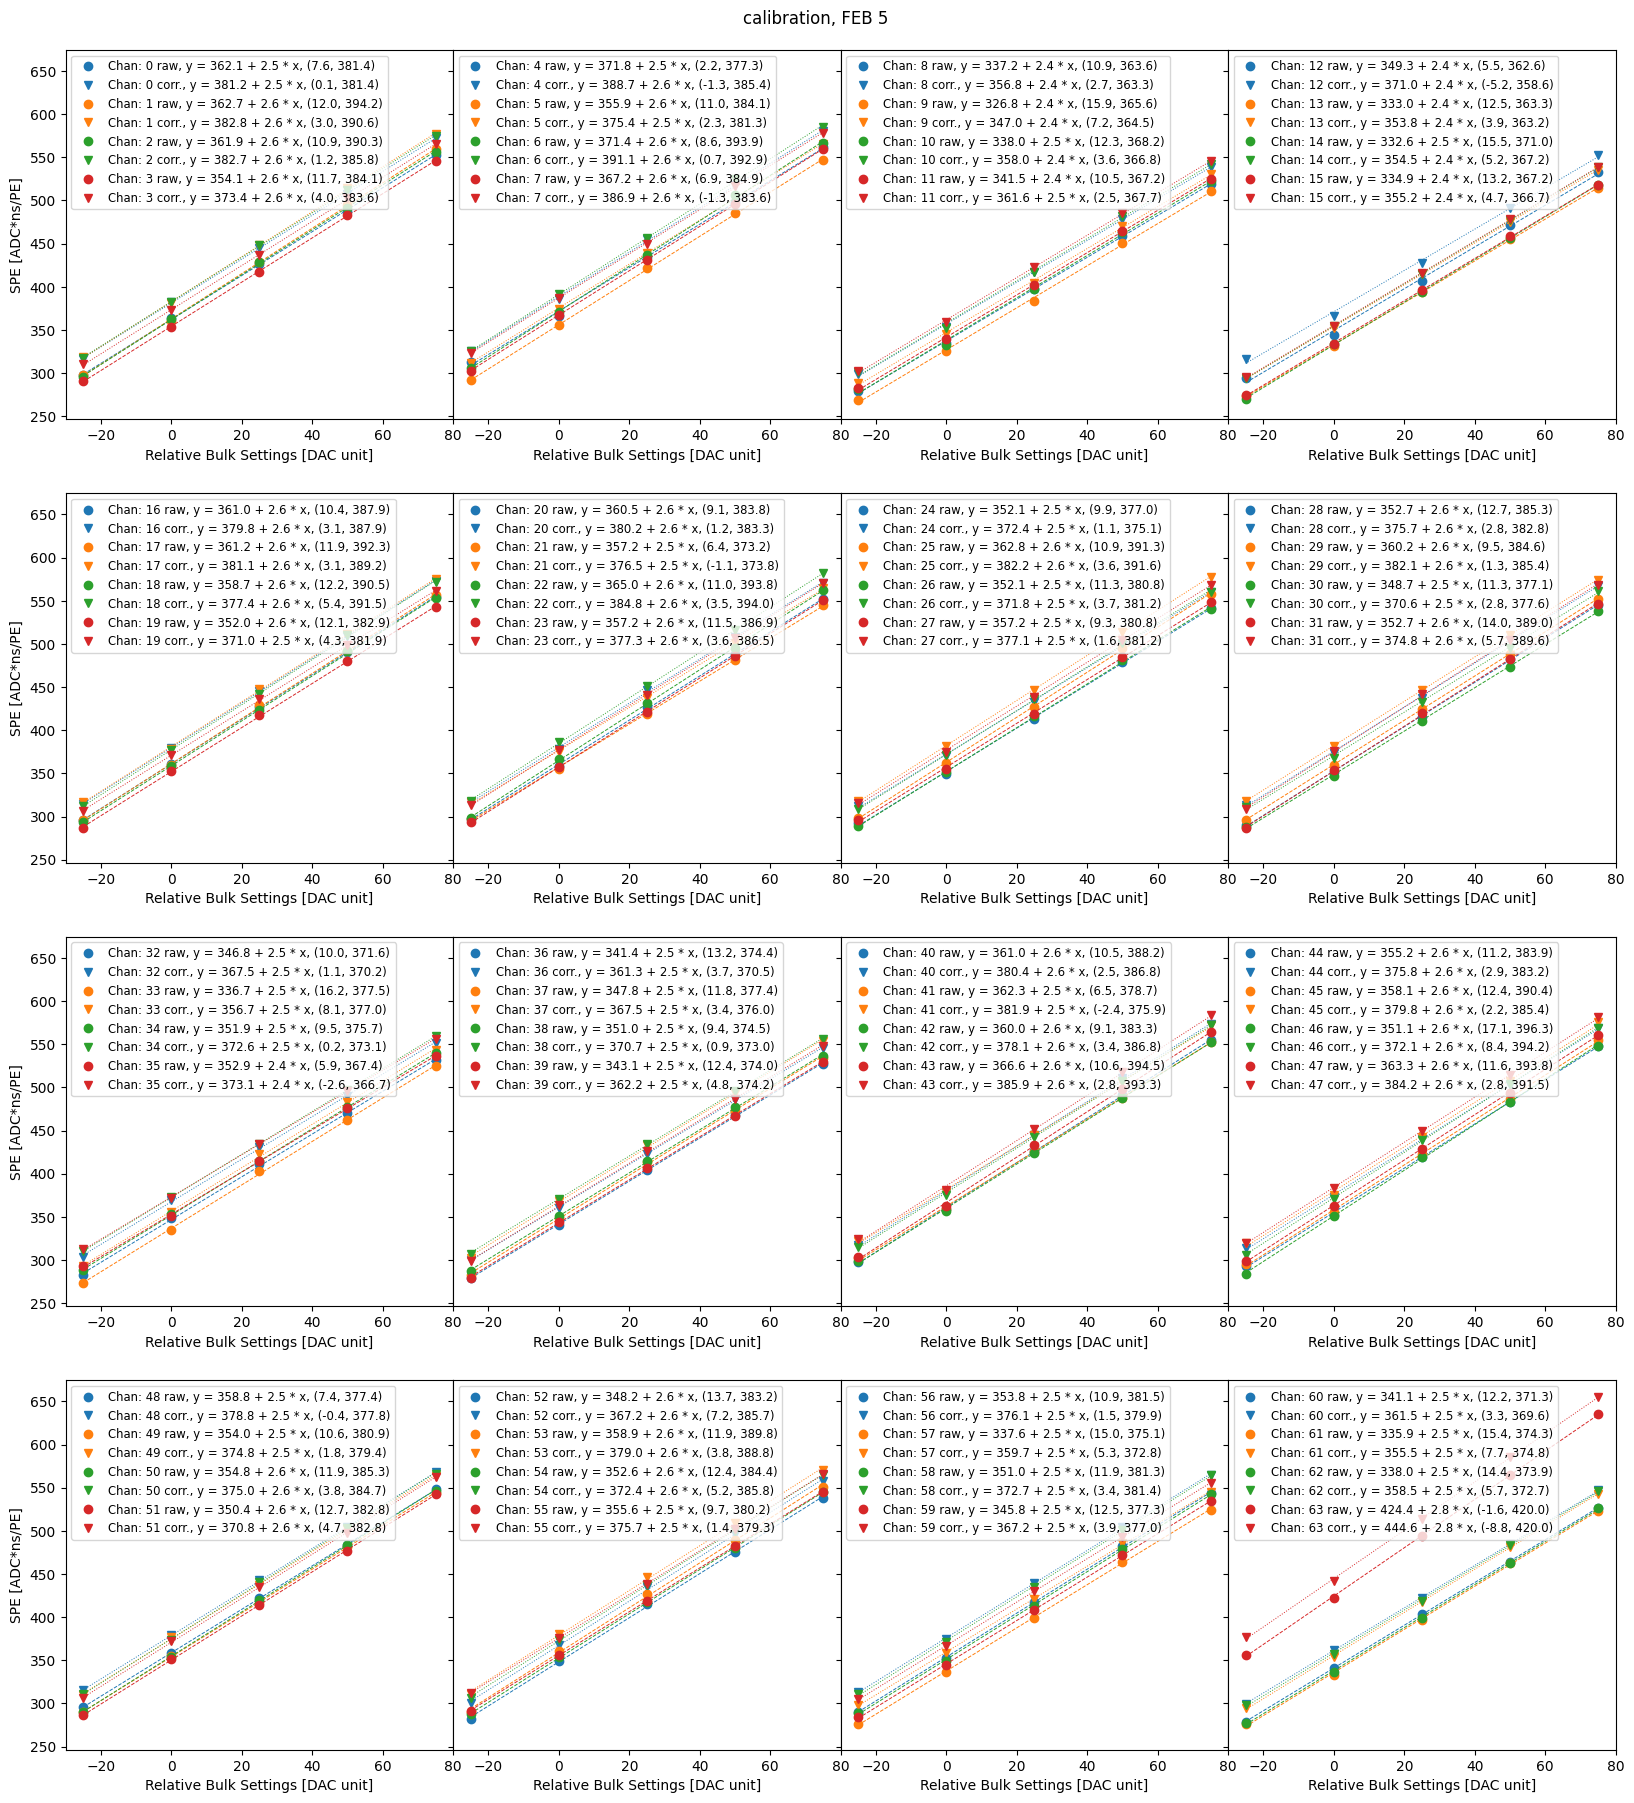

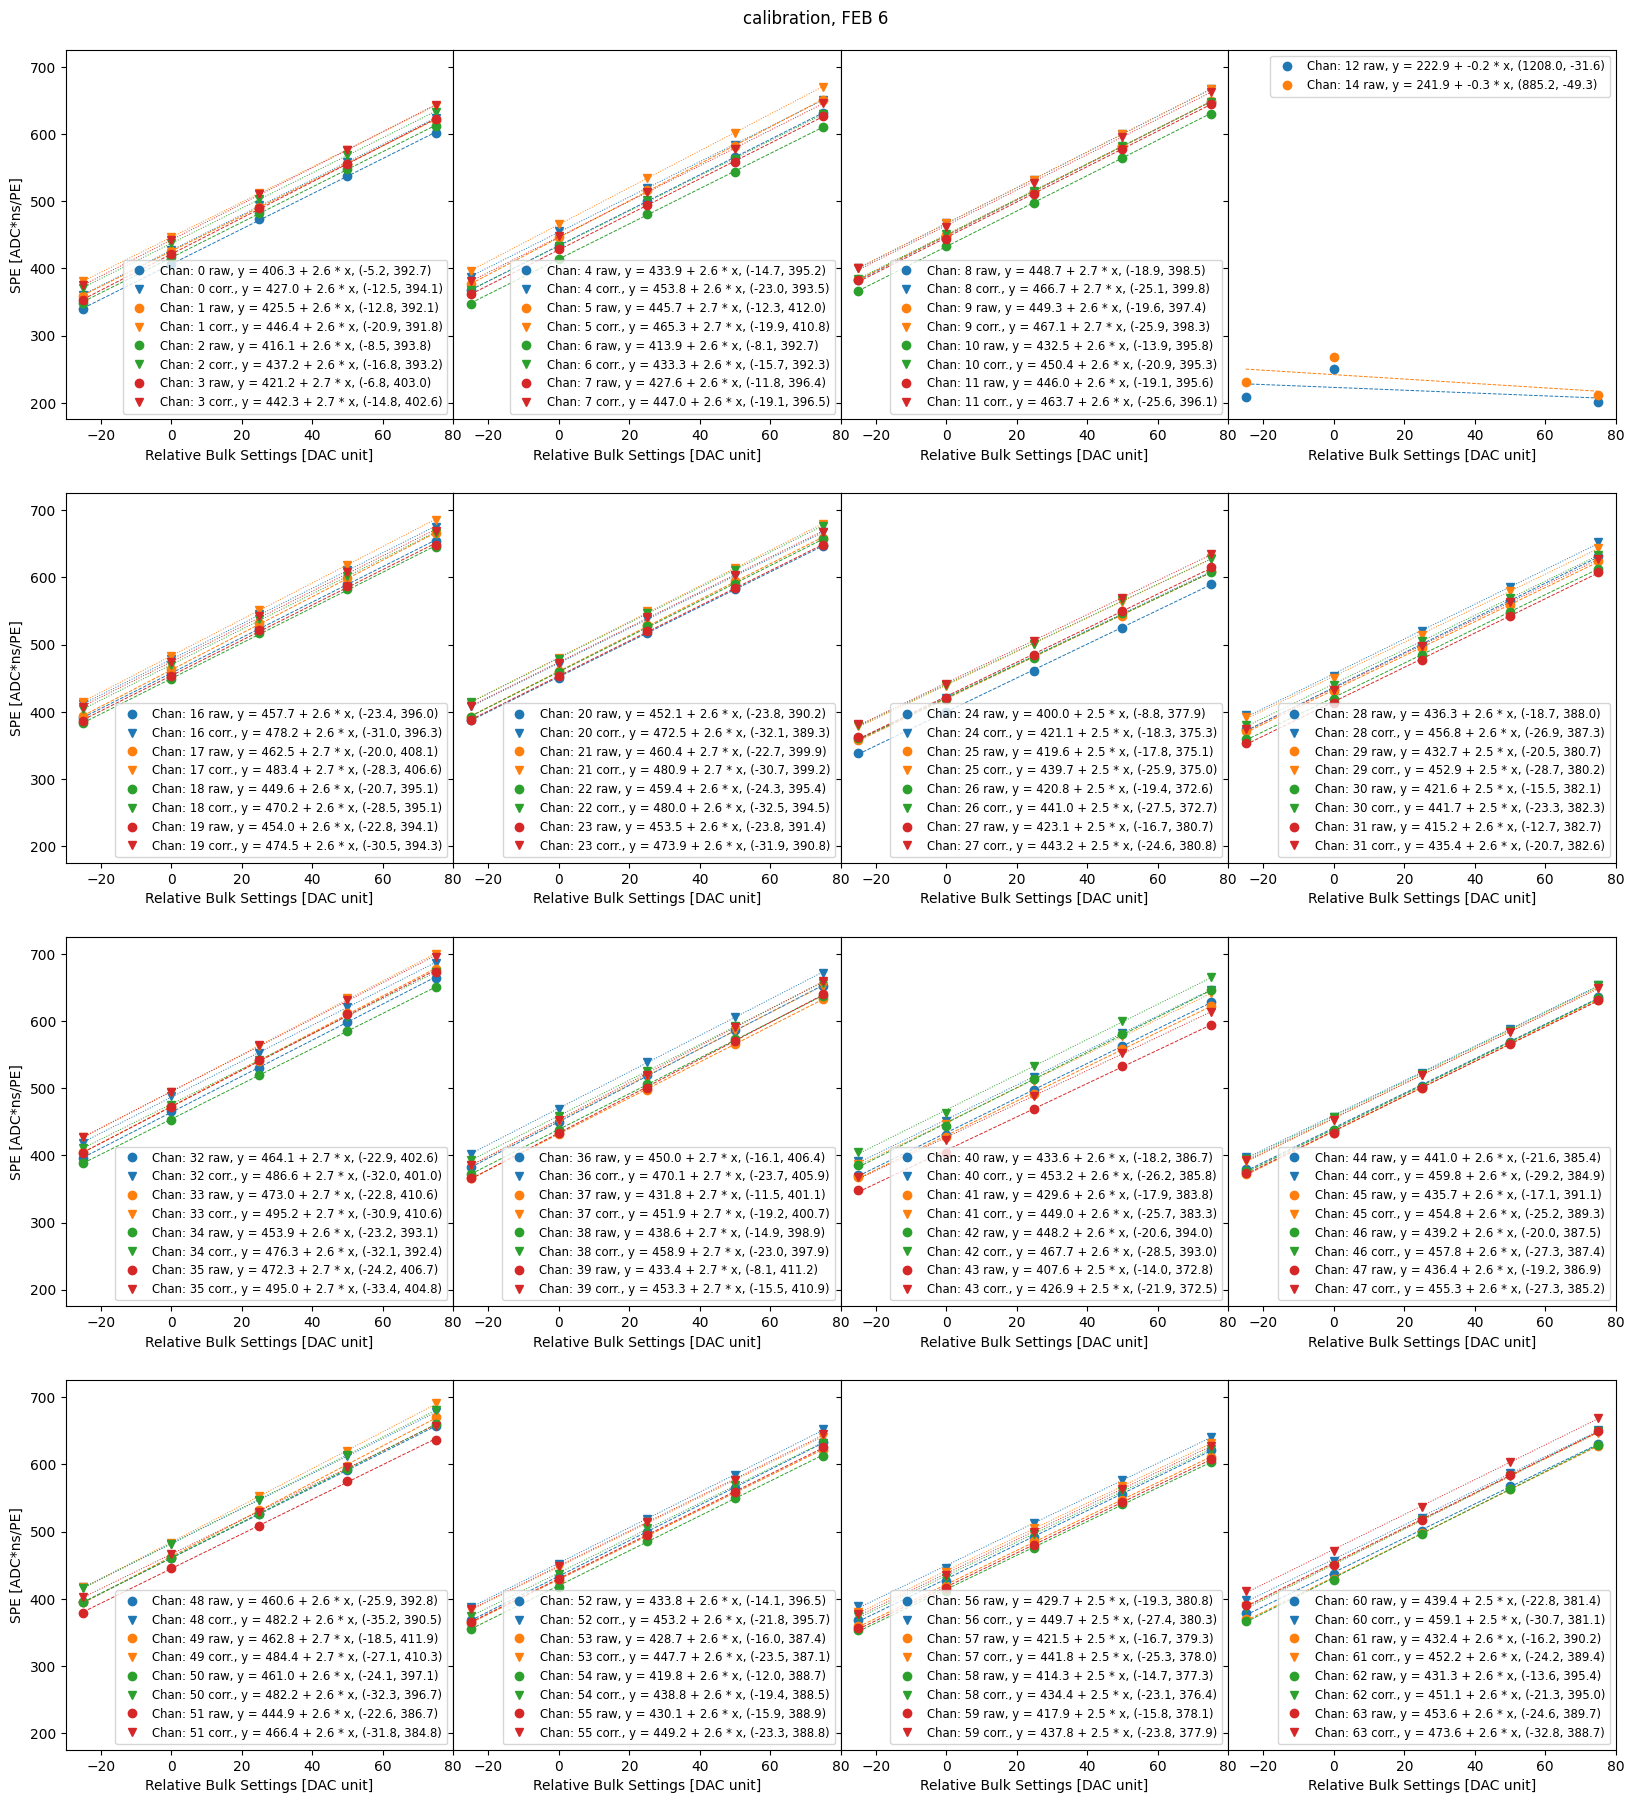

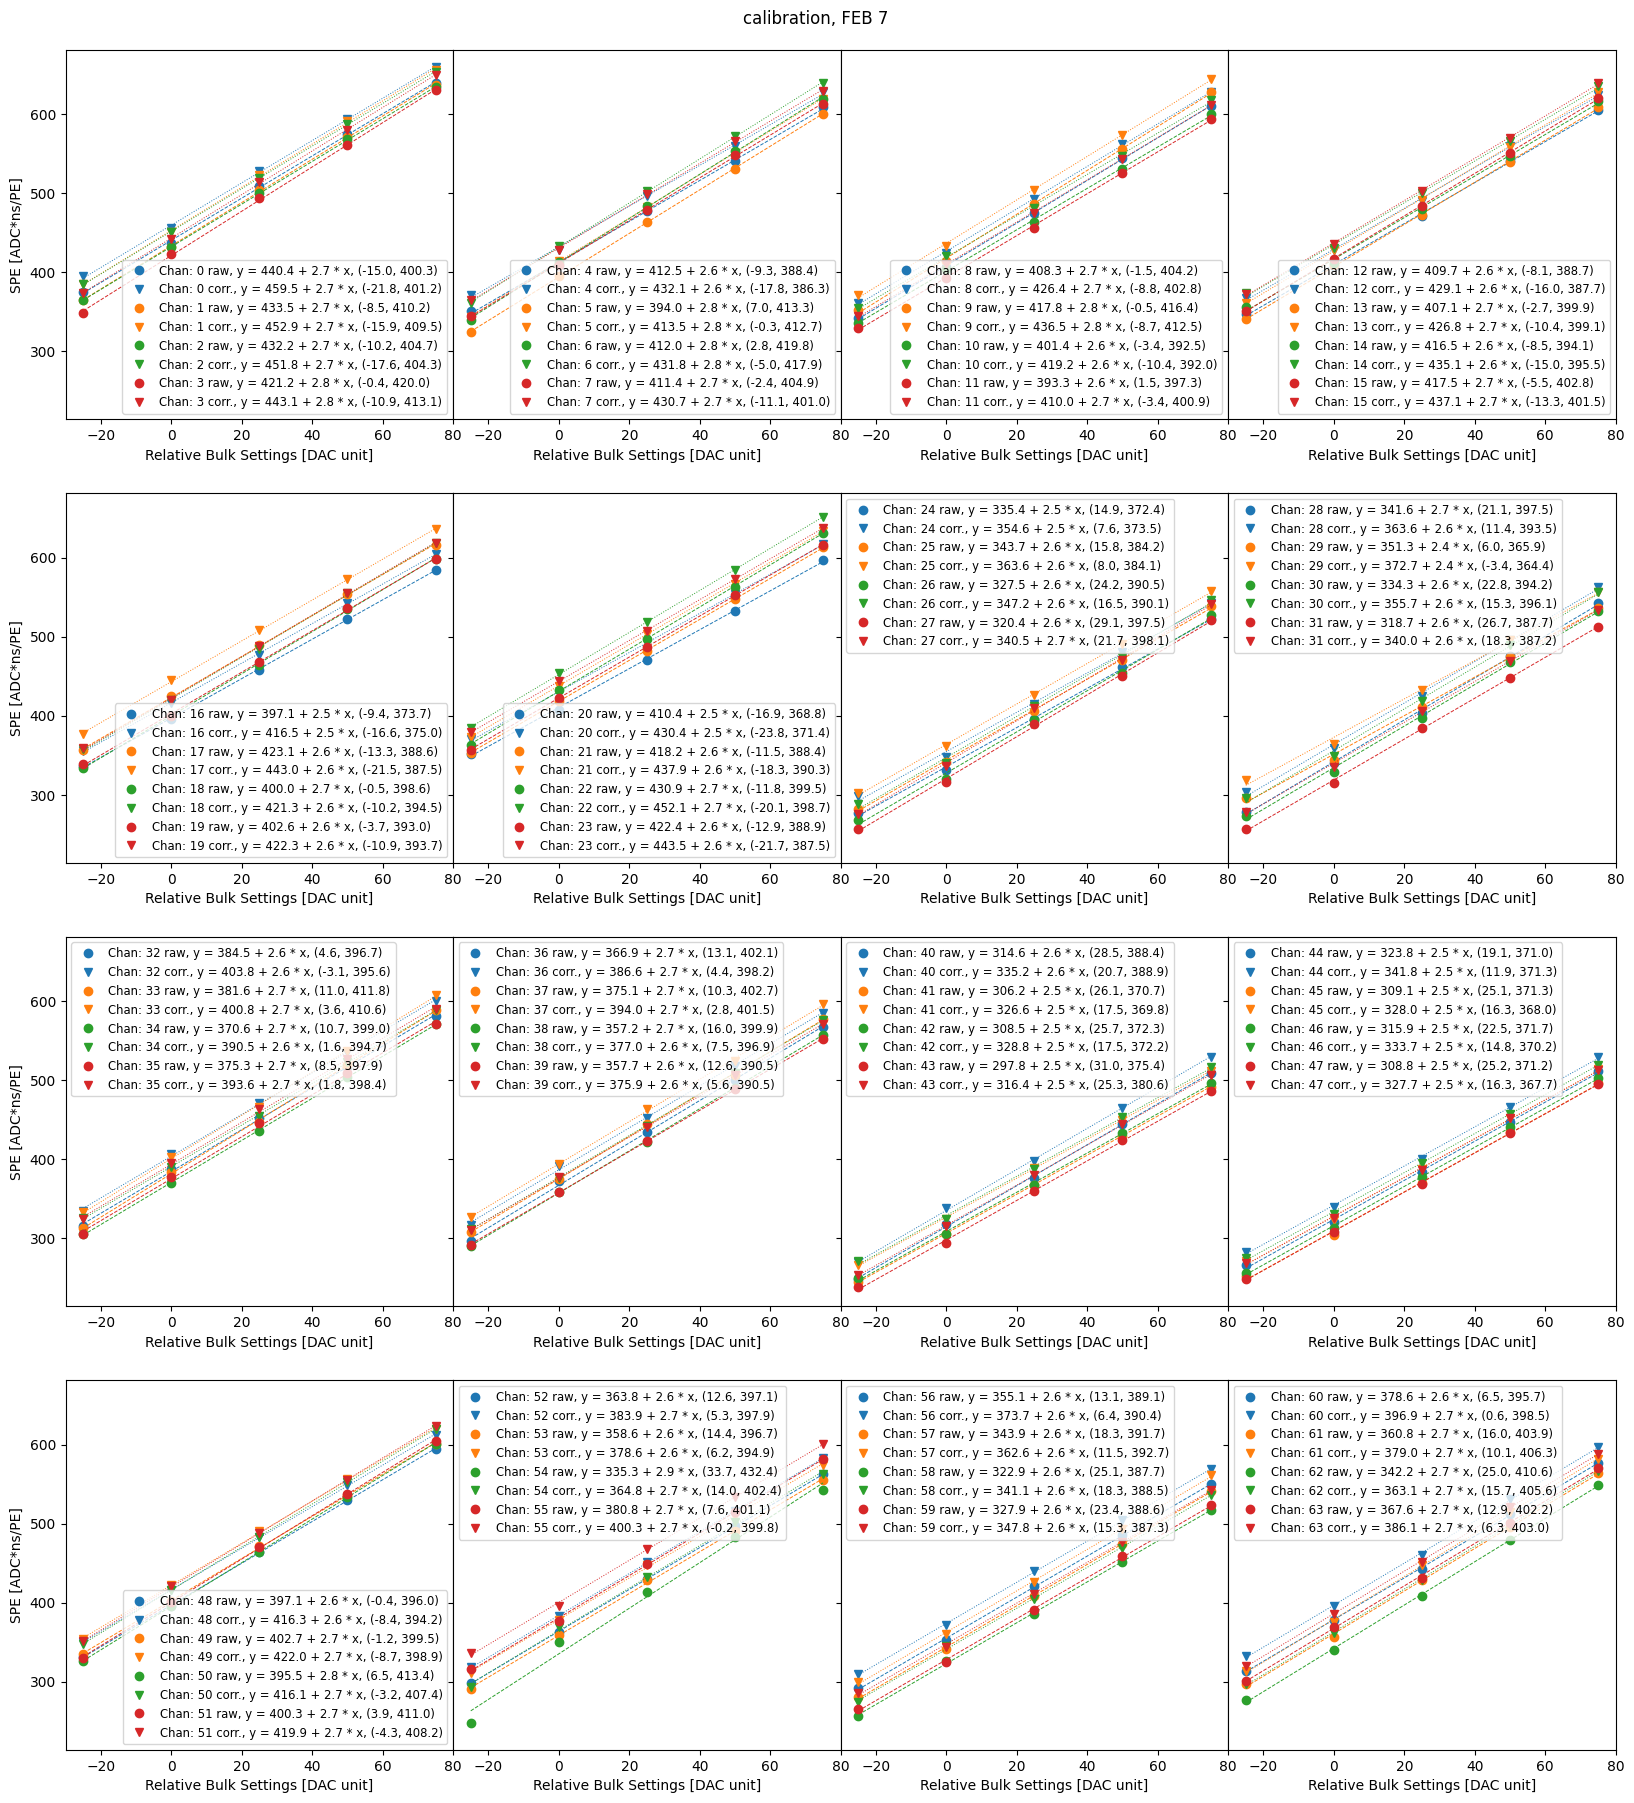

In [4]:
df = PortToDFwithBulk(fileList, filepath.datatag["bulk_scan_crvaging020"]["bulk"])
display(df)
df_calib = CalibrateByScan(df)
# display(df_calib)

### Problem channels

In [5]:
# display(df[ (df["FEB"] == 2) & (df["ch"] > 19) & (df["ch"] < 24) ])
# display(df[ (df["FEB"] == 6) & (df["ch"] > 11) & (df["ch"] < 16) ])
display(df[ (df["FEB"] == 6) & ((df["ch"] >= 13) & (df["ch"] <= 15)) ])

run  subrun  FEB  ch   pedestal    calibRaw  calibAdj    FEBtemp  \
397   2114       0    6  13   4.373160  230.938004       0.0  43.365170   
398   2114       0    6  14  -3.481720  230.934998       0.0  43.365170   
399   2114       0    6  15  22.175400  227.263000       0.0  43.365170   
909   2115       0    6  13   4.332540    0.000000       0.0  43.122402   
910   2115       0    6  14  -3.539310  267.377991       0.0  43.122402   
911   2115       0    6  15  22.233200    0.000000       0.0  43.122402   
1421  2116       0    6  13   4.329420  530.380981       0.0  43.291069   
1422  2116       0    6  14  -3.476850    0.000000       0.0  43.291069   
1423  2116       0    6  15  22.253099    0.000000       0.0  43.291069   
1933  2117       0    6  13   4.302990    0.000000       0.0  43.255863   
1934  2117       0    6  14  -3.466030    0.000000       0.0  43.255863   
1935  2117       0    6  15  22.263201    0.000000       0.0  43.255863   
2445  2118       0    6  13   4.169570    0.000000       0.0  43.504814   
2446  2118       0    6  14  -3.432740  210.800995       0.0  43.504814   
2447  2118       0    6  15  22.251301    0.000000       0.0  43.504814   

      CMBtemp      biasV  PEs  PEsCorrected  bulkRelative  
397       0.0  53.548977  0.0           0.0           -25  
398       0.0  53.548977  0.0           0.0           -25  
399       0.0  53.548977  0.0           0.0           -25  
909       0.0  54.020699  0.0           0.0             0  
910       0.0  54.020699  0.0           0.0             0  
911       0.0  54.020699  0.0           0.0             0  
1421      0.0  54.503574  0.0           0.0            25  
1422      0.0  54.503574  0.0           0.0            25  
1423      0.0  54.503574  0.0           0.0            25  
1933      0.0  55.011040  0.0           0.0            50  
1934      0.0  55.011040  0.0           0.0            50  
1935      0.0  55.011040  0.0           0.0            50  
2445      0.0  55.511116  0.0           0.0            75  
2446      0.0  55.511116  0.0           0.0            75  
2447      0.0  55.511116  0.0           0.0            75

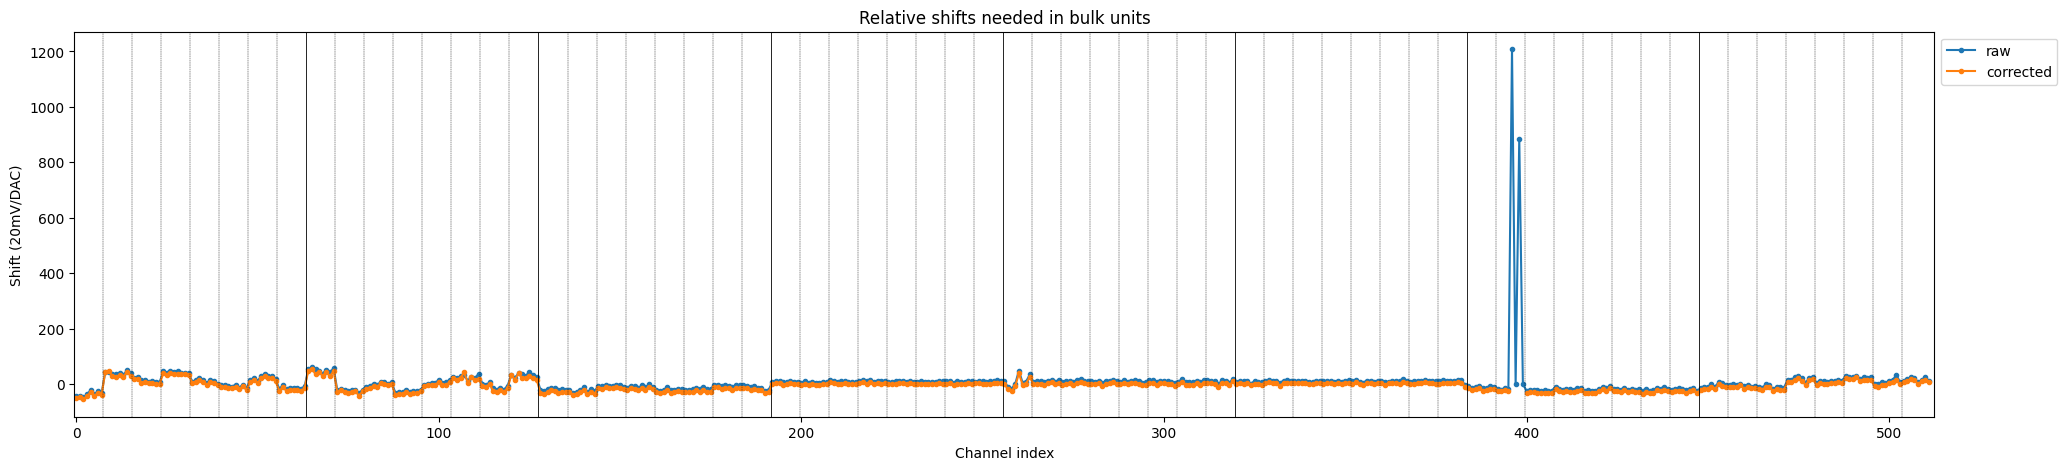

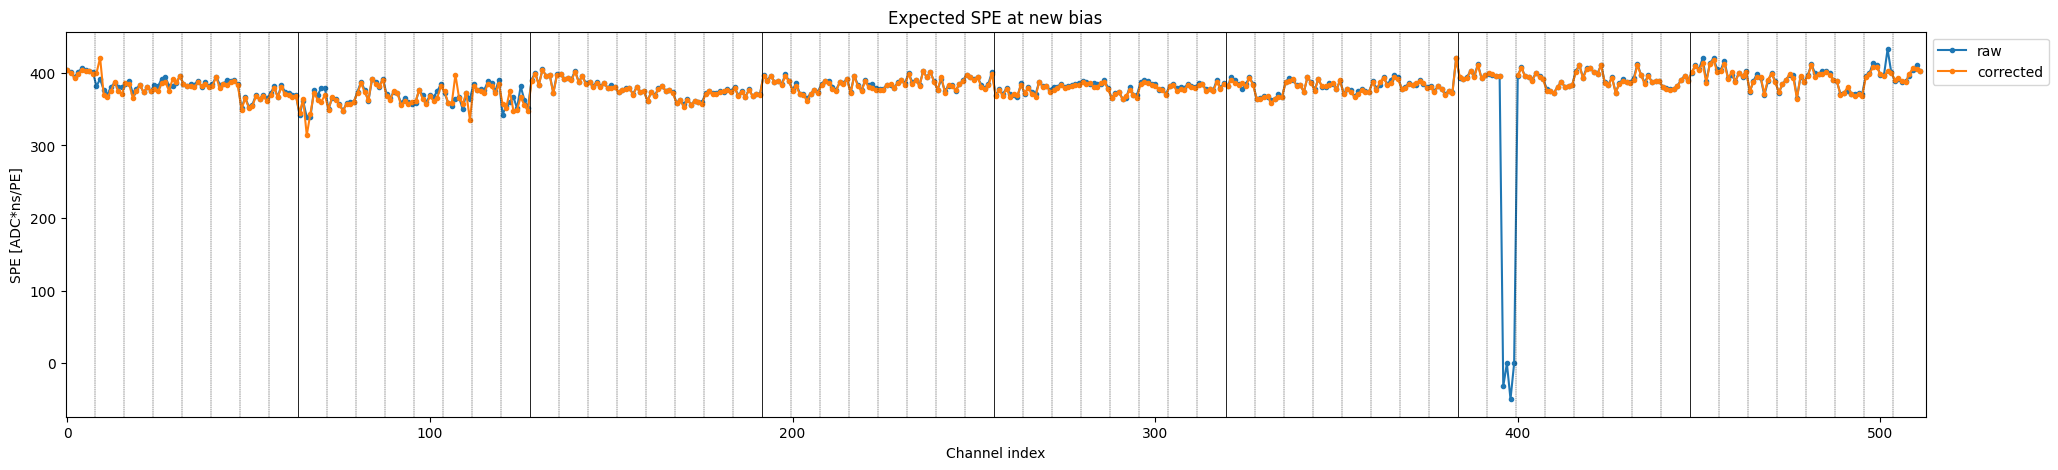

In [6]:
# check consistency
plt.figure(figsize = (24,5))
plt.plot(np.add(df_calib['FEB']*64,df_calib['ch']), df_calib['bulkRelativeSettingRaw'], '.-', label=('raw'))
plt.plot(np.add(df_calib['FEB']*64,df_calib['ch']), df_calib['bulkRelativeSettingCorr'], '.-', label=('corrected'))
plt.title("Relative shifts needed in bulk units")
plt.xlabel("Channel index")
plt.ylabel("Shift (20mV/DAC)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
for iFEB in range(8):
    for iAFE in range(8):
        plt.axvline(x=8*(iFEB*8+iAFE)-0.5, color='k', linestyle='-'if iAFE==0 else '--', linewidth=0.6 if iAFE==0 else 0.3)
plt.gca().set_xlim(-0.5, 8*64+0.5)
plt.show()

plt.figure(figsize = (24,5))
plt.plot(np.add(df_calib['FEB']*64,df_calib['ch']), df_calib['SPErefRaw'], '.-', label=('raw'))
plt.plot(np.add(df_calib['FEB']*64,df_calib['ch']), df_calib['SPErefCorr'], '.-', label=('corrected'))
plt.title("Expected SPE at new bias")
plt.xlabel("Channel index")
plt.ylabel("SPE [ADC*ns/PE]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
for iFEB in range(8):
    for iAFE in range(8):
        plt.axvline(x=8*(iFEB*8+iAFE)-0.5, color='k', linestyle='-'if iAFE==0 else '--', linewidth=0.6 if iAFE==0 else 0.3)
plt.gca().set_xlim(-0.5, 8*64+0.5)
plt.show()

In [7]:
def UpdateSettings(originalSettingsFiles, outputSettingsFiles, df_calib, useCorr = True, AFEmask = 0xff):
    FEBs = df_calib['FEB'].unique()
    FEBs = np.sort(FEBs)

    for FEB in FEBs:
        print("FEB%i"%FEB)
        myFilename = os.path.join(settings_dir, originalSettingsFiles[FEB])
        mySettings = settings_file.settingsFile(myFilename)
        print("before change")
        mySettings.Print()
        for chan in range(64):
            df_calib_ = df_calib.query("FEB==%i & ch==%i"%(FEB, chan)).reset_index()
            # display(df_calib_)
            if df_calib_ is not None and len(df_calib_.index)>0:
                adjustment = df_calib_['bulkRelativeSettingCorr'][0] if useCorr else df_calib_['bulkRelativeSettingRaw'][0]
                if np.isnan(adjustment):
                    mySettings.trims[chan] = 0xdead
                else:
                    mySettings.trims[chan] += int(adjustment * MV_PER_BULK / MV_PER_TRIM)
        print("no balance")
        mySettings.Print()
        mySettings.BalanceBiasTrimBulk()
        print("after change")
        mySettings.Print()
        print("\n\n\n")
        if outputSettingsFiles != None:
            mySettings.DumpToTxt(os.path.join(settings_dir, outputSettingsFiles[FEB]))
        else:
            mySettings.DumpToTxt(None, AFEmask)
    return

In [8]:
initial_settings_files = [
    f"Settings_crvaging-019_FEB{i}_sync402.txt" for i in range(8)
]

output_settings_files = ["Settings_crvaging-020_FEB%i_sync402.txt"%i for i in range(8)]

UpdateSettings(initial_settings_files, output_settings_files, df_calib, True) # used corrected to 20 degC

FEB0
before change
BULK| TRIM                           |GAIN
----+--------------------------------+----
A9D |7D1 7CF 7E2 810 864 815 820 7D9 |384
A72 |816 801 7F8 7E9 803 7DA 836 80A |384
AA6 |837 85F 7F7 82B 7E2 7CF 7CA 7E1 |384
A7E |833 811 7F4 7FA 828 7DF 805 7E4 |384
A88 |7FA 7F7 827 813 7F5 81B 800 7EB |384
A78 |812 812 7EC 7E5 81E 807 811 7F5 |384
A73 |7F1 7FC 7D2 81A 82C 80A 81A 7E4 |384
A99 |80C 821 7DF 7FF 7FC 802 7E2 82C |384
no balance
BULK| TRIM                           |GAIN
----+--------------------------------+----
A9D |9BC 9AE A01 9C9 97A 9C0 95B 96B |384
A72 |654 618 6D7 6D6 6C6 6CD 686 6E1 |384
AA6 |787 797 7C0 7E1 7C6 7A5 7BA 7E3 |384
A7E |6AA 6C8 65F 68C 6B0 66E 694 68E |384
A88 |7D7 7A5 79F 7C5 815 7C5 7CA 816 |384
A78 |886 86F 888 879 886 8C6 85A 8D2 |384
A73 |799 76C 7B1 747 704 72D 736 777 |384
A99 |905 885 8D7 8C3 8C6 8E0 8D6 8BF |384
after change
BULK| TRIM                           |GAIN
----+--------------------------------+----
A73 |818 80A 85D 825 7D6 81